<a href="https://colab.research.google.com/github/arlspt/Machine_Learning/blob/main/Pertemuan6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Muhammad Ariel Saputra<br>
NIM: 2241720034<br>
Kelas: TI-3D

# **Job Sheet 6: Ensemble Learning**

# Praktikum 1

**Bagging dengan RandomForest**


Import Library


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Persiapan Data

In [ ]:
# Load data
df = pd.read_csv('data/wbc.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Cek kolom null
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X = df.iloc[:,3:-1]
y = df['diagnosis']
y = y.map({'M':1, 'B':0}) # Encode label

# Cek jumlah fitur dan instance
X.shape

(569, 29)

Split data training dan testing


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Traning Decision Tree


In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.94
Test set accuracy: 0.9385964912280702


Training RandomForest


In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.96
Test set accuracy: 0.956140350877193


# Praktikum 2

**Boosting dengan AdaBoost**

Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label

Persiapan Data

In [ ]:
# Load data
df = pd.read_csv('data/iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Cek kolom null
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Seleksi fitur
X = df.iloc[:,2:-1]
y = df['Species']

# encode label
ec = LabelEncoder()
y = ec.fit_transform(y)

# Cek jumlah fitur dan instance
print(X.shape)

# Cek label
print(y)

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data training dan testing


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Training Decision Tree


In [ ]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


Training AdaBoost


In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada AdaBoost
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

ada = AdaBoostClassifier(n_estimators=2)

# Sesuaikan dt ke set training
ada.fit(X_train, y_train)

# Memprediksi label set test
y_pred_ada = ada.predict(X_test)

#  menghitung set accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Praktikum 3

**Stacking**

# Praktikum 4

**Stacking dengan Voting**

Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB # import Naive Bayes model Gaussian (asumsi data terdistribusi normal)
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Persiapan Data

In [ ]:
# Load Data

dbt = pd.read_csv('data/diabetes.csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Cek nama kolom
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Cek kolom null
dbt.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Pada kasus ini, agak tidak masuk akal jika beberapa parameter bernilai 0
# sebagai contoh adalah nilai 'Glucose', 'BloodPlessure' ataupun 'Insulin'.
# Sekecil apapun nilainya, setiap manusia yang hidup pasti miliki nilai-nilai tersebut

# Kita akan manipulasi nilai yang 0 dengan melakukan 'imputasi' atau mengganti nilainya dengan nilai sintetis
# Pada kasus ini, kita akan menggunakan nilai mean

# Cek kolom neng nilai 0
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [ ]:
# Impute nilai 0 dengan mean
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])

Split data training dan testing


In [ ]:
X = dbt[feature_columns]
y = dbt.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Training dengan GaussianNB**

Standarisasi Fitur



In [ ]:
# Karena asumsi Gaussian NB adalah data terdistribusi secara normal,
# maka kita perlu melakukan standarisasi

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Training dan Evaluasi



In [ ]:
# Buat obyek GaussianNB
gnb_std = GaussianNB()

# Fit dengan data yang telah di standarisasi
gnb_std.fit(X_train_std, y_train)

# Prediksi dengan data test
y_pred_gnb = gnb_std.predict(X_test_std)

# Evaluasi akurasi testing data
acc_gnb = accuracy_score(y_test, y_pred_gnb)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_gnb))
print(f"Test set accuracy: {acc_gnb}")

Test set accuracy: 0.74
Test set accuracy: 0.7359307359307359


Training dengan SVM Liner

In [ ]:
# Model SVM linier tanpa tunnning hyperparameter
svm_lin = SVC(kernel='linear')

# Fit ke model
svm_lin.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_lin = svm_lin.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_lin = accuracy_score(y_test, y_pred_svm_lin)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_lin))
print(f"Test set accuracy: {acc_svm_lin}")

Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


Training dengan SVM RBF


In [ ]:
# Model SVM RBF tanpa tunnning hyperparameter
svm_rbf = SVC(kernel='rbf')

# Fit ke model
svm_rbf.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_rbf = svm_rbf.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_rbf))
print(f"Test set accuracy: {acc_svm_rbf}")

Test set accuracy: 0.72
Test set accuracy: 0.7229437229437229


Training dengan Voting


In [ ]:
# Definisikan algoritma yang akan digunakan untuk voting

clf1 = GaussianNB()
clf2 = SVC(kernel='linear')
clf3 = SVC(kernel='rbf', probability=True)

# model hard voting
voting = VotingClassifier(estimators=[('GaussianNB', clf1), ('SVM-LIN', clf2), ('SVM-RBF', clf3)], voting='hard')

# Fit model
voting.fit(X_train_std, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test_std)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


# Tugas 1

Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

Preview data:
   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p        

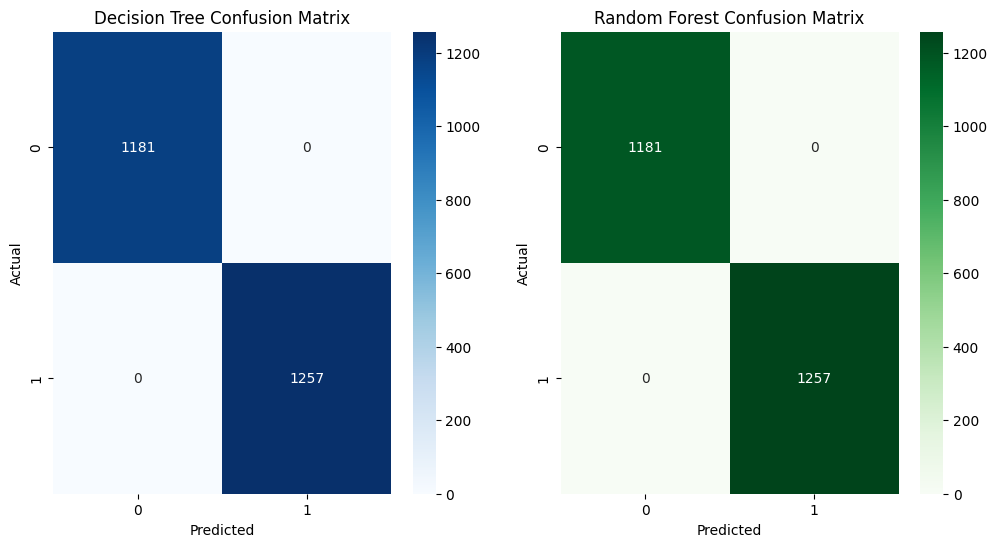

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset mushrooms
data = pd.read_csv('data/mushrooms.csv')

# Menampilkan 5 baris pertama data
print("Preview data:\n", data.head())

# Data Preprocessing
# Ubah fitur kategorikal menjadi numerik
data_encoded = pd.get_dummies(data)

# Pisahkan fitur dan target
X = data_encoded.drop('class_e', axis=1)  # 'class_e' adalah target (edible/poisonous)
y = data_encoded['class_e']  # 1: edible, 0: poisonous

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisikan model Decision Tree dan RandomForest
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning menggunakan GridSearchCV untuk Decision Tree
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print(f"Decision Tree Best Parameters: {dt_grid.best_params_}")

# Hyperparameter tuning menggunakan GridSearchCV untuk RandomForest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print(f"RandomForest Best Parameters: {rf_grid.best_params_}")

# Evaluasi performa model
dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_

# Prediksi dan evaluasi Decision Tree
y_pred_dt = dt_best.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Prediksi dan evaluasi RandomForest
y_pred_rf = rf_best.predict(X_test)
print(f"RandomForest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


# Tugas 2

Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1181
        True       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

AdaBoost Accuracy: 1.0
AdaBoost Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1181
        True       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



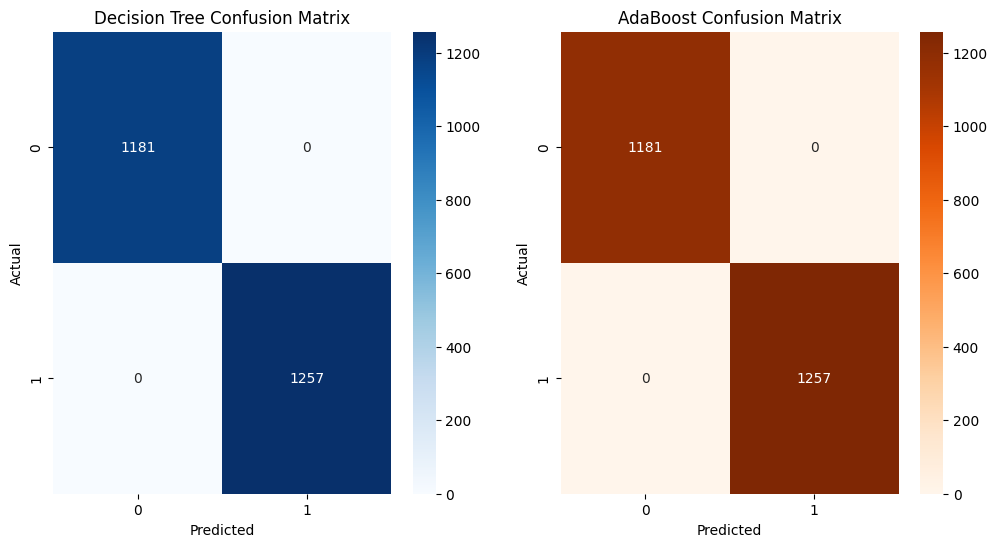

In [ ]:
# Import library tambahan
from sklearn.ensemble import AdaBoostClassifier

# Definisikan model AdaBoost dengan Decision Tree sebagai estimator
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Hyperparameter tuning untuk Decision Tree (sama seperti sebelumnya)
dt_grid.fit(X_train, y_train)  # Menggunakan grid yang sudah didefinisikan pada Tugas 1

# Hyperparameter tuning untuk AdaBoost
ada_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
ada_grid = GridSearchCV(ada_model, ada_params, cv=5, scoring='accuracy')
ada_grid.fit(X_train, y_train)
print(f"AdaBoost Best Parameters: {ada_grid.best_params_}")

# Evaluasi performa model
dt_best = dt_grid.best_estimator_
ada_best = ada_grid.best_estimator_

# Prediksi dan evaluasi Decision Tree
y_pred_dt = dt_best.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Prediksi dan evaluasi AdaBoost
y_pred_ada = ada_best.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))

# Plot confusion matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Oranges')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


# Tugas 3

Preview data diabetes:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Ensemble Voting Accuracy: 0.7359307359307359
Ensemble Voting Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


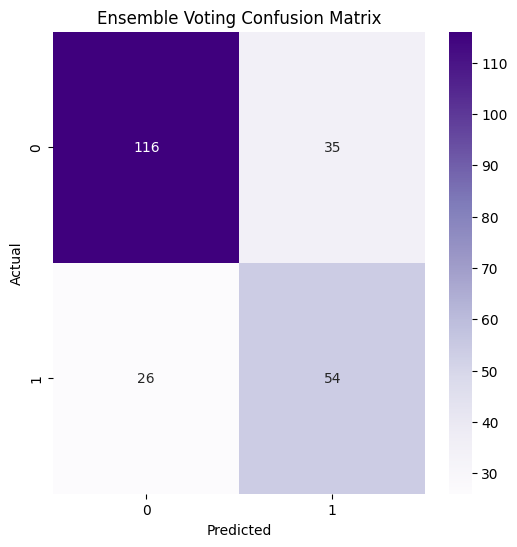

In [ ]:
# Import library tambahan untuk Tugas 3
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Load dataset diabetes
diabetes_data = pd.read_csv('data/diabetes.csv')

# Menampilkan 5 baris pertama data
print("Preview data diabetes:\n", diabetes_data.head())

# Pisahkan fitur dan target
X_diabetes = diabetes_data.drop('Outcome', axis=1)  # 'Outcome' adalah target
y_diabetes = diabetes_data['Outcome']

# Bagi data menjadi training dan testing
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)

# Definisikan model Logistic Regression, SVM, dan Decision Tree
logreg = LogisticRegression(random_state=42)
svm = SVC(kernel='poly', probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# Buat ensemble voting classifier
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('svm', svm), ('dt', dt)], voting='soft')

# Train model
voting_clf.fit(X_train_diabetes, y_train_diabetes)

# Prediksi dan evaluasi
y_pred_voting = voting_clf.predict(X_test_diabetes)
print(f"Ensemble Voting Accuracy: {accuracy_score(y_test_diabetes, y_pred_voting)}")
print("Ensemble Voting Classification Report:\n", classification_report(y_test_diabetes, y_pred_voting))

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test_diabetes, y_pred_voting), annot=True, fmt='d', cmap='Purples')
plt.title('Ensemble Voting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
